In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#from sklearn.preprocessing import
d=pd.read_csv("C:/Users/epsib/Downloads/improved_disease_dataset.csv")
print(d.head())
print(d.tail())
print(d.shape)

#sns.heatmap(d.corr(), annot=True))


   fever  headache  nausea  vomiting  fatigue  joint_pain  skin_rash  cough  \
0      1         0       1         0        1           0          0      1   
1      0         0       1         0        0           0          1      1   
2      0         0       1         0        1           0          1      1   
3      0         0       1         1        1           0          1      1   
4      1         0       1         0        1           0          0      0   

   weight_loss  yellow_eyes                       disease  
0            1            0  Paralysis (brain hemorrhage)  
1            0            0  Paralysis (brain hemorrhage)  
2            0            0  Paralysis (brain hemorrhage)  
3            1            1  Paralysis (brain hemorrhage)  
4            1            1  Paralysis (brain hemorrhage)  
      fever  headache  nausea  vomiting  fatigue  joint_pain  skin_rash  \
1995      1         1       0         0        1           0          0   
1996      1    

In [3]:
from sklearn.model_selection import train_test_split
print(d.isnull().sum())

fever          0
headache       0
nausea         0
vomiting       0
fatigue        0
joint_pain     0
skin_rash      0
cough          0
weight_loss    0
yellow_eyes    0
disease        0
dtype: int64


In [19]:
print(d.describe())

             fever     headache       nausea     vomiting      fatigue  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.328000     0.413000     0.378500     0.526000     0.365500   
std       0.469602     0.492496     0.485134     0.499448     0.481691   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     1.000000     0.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        joint_pain    skin_rash       cough  weight_loss  yellow_eyes  
count  2000.000000  2000.000000  2000.00000  2000.000000  2000.000000  
mean      0.450500     0.387000     0.55500     0.456000     0.449000  
std       0.497668     0.487185     0.49709     0.498185     0.497517  
min       0.000000     0.000000     0.00000  

In [20]:
print(d.info)

<bound method DataFrame.info of       fever  headache  nausea  vomiting  fatigue  joint_pain  skin_rash  \
0         1         0       1         0        1           0          0   
1         0         0       1         0        0           0          1   
2         0         0       1         0        1           0          1   
3         0         0       1         1        1           0          1   
4         1         0       1         0        1           0          0   
...     ...       ...     ...       ...      ...         ...        ...   
1995      1         1       0         0        1           0          0   
1996      1         0       0         0        1           1          1   
1997      1         0       0         1        0           0          0   
1998      0         0       0         0        1           1          0   
1999      0         0       0         1        1           1          0   

      cough  weight_loss  yellow_eyes                       disease

In [ ]:
#dropping the target column and storing in another variable
x=d.drop('disease', axis=1)
y=d["disease"]

In [8]:
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest Algorithm
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
print(model)

RandomForestClassifier(random_state=42)


In [10]:
# Predict on training data
y_train_pred = model.predict(x_train)

In [11]:
#getting the feature importance
importances = pd.Series(model.feature_importances_, index=x.columns)

important_features = importances.sort_values(ascending=False)
print("Top Important Features:\n")
print(important_features)

Top Important Features:

fever          0.118727
skin_rash      0.118644
nausea         0.115382
headache       0.112367
vomiting       0.098825
fatigue        0.094212
joint_pain     0.089921
weight_loss    0.087374
cough          0.087190
yellow_eyes    0.077358
dtype: float64


In [1]:
train_comparison = pd.DataFrame({
    'Actual disease': y_train,
    'Predicted disease': y_train_pred
}
print(train_comparison.head(10))  # Show first 10 rows

SyntaxError: '(' was never closed (1773072544.py, line 1)

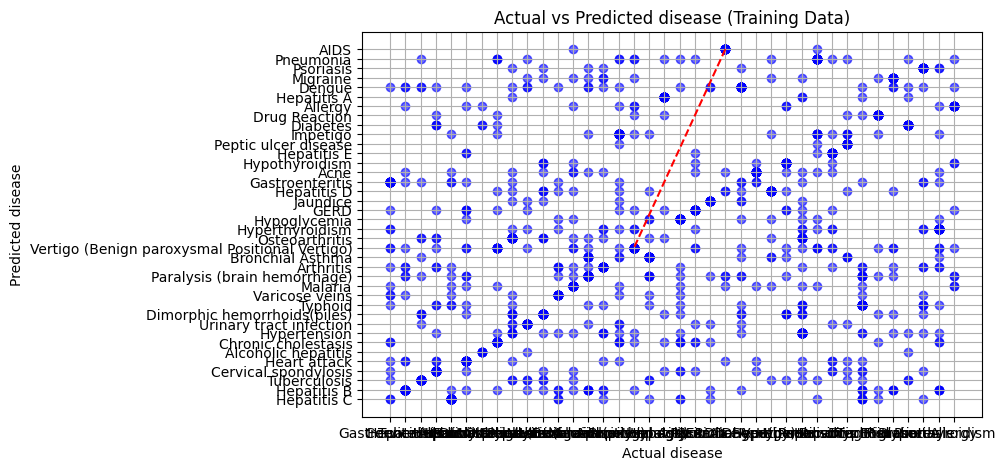

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # reference line
plt.xlabel("Actual disease")
plt.ylabel("Predicted disease")
plt.title("Actual vs Predicted disease (Training Data)")
plt.grid(True)
plt.show()

C:\Users\epsib\AppData\Local\Temp\ipykernel_16508\807923064.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=important_features[:top_n], y=important_features.index[:top_n], palette="viridis")


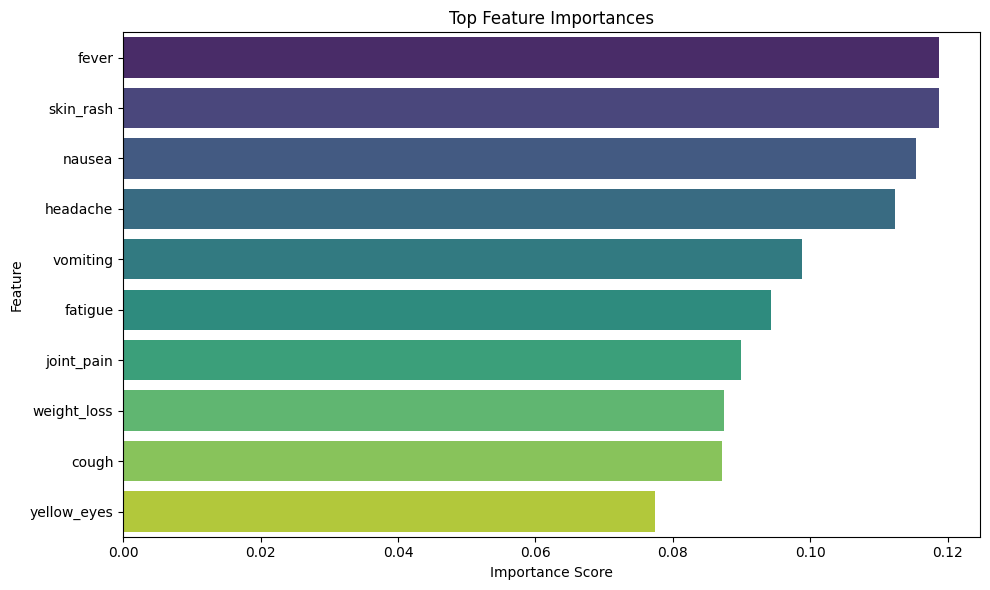

In [14]:
top_n = 10  # You can change this to show more or fewer
plt.figure(figsize=(10, 6))
sns.barplot(x=important_features[:top_n], y=important_features.index[:top_n], palette="viridis")
plt.title("Top Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

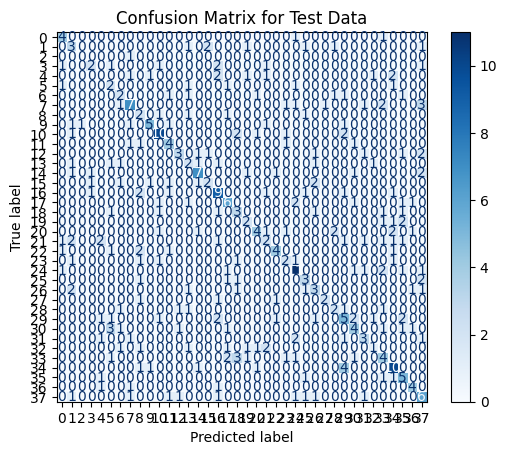

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Predict on the test data
y_test_pred = model.predict(X_test)

# Step 2: Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Step 3: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Optional: You can change the color
plt.title("Confusion Matrix for Test Data")
plt.show()


In [17]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix:
[[4 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 4 0]
 [0 1 0 ... 0 0 6]]
